In [4]:
import requests
import pandas as pd
from pprint import pprint
from lxml import etree
import time
import re
import warnings
warnings.filterwarnings("ignore")

 # 爬取数据

## 爬1-100页

In [5]:
# 爬取1-100页
for i in range(1,100):
    print("正在爬取第" + str(i) + "页的数据")
    url_pre = "https://search.51job.com/list/030200,000000,0000,00,9,99,%25E6%2595%25B0%25E6%258D%25AE,2,"
    url_end = ".html?"
    url = url_pre + str(i) + url_end
    
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.86 Safari/537.36'
    }
    
    web = requests.get(url, headers=headers)
    web.encoding = "gbk"
    
    dom = etree.HTML(web.text)
    
    # XPATH上线
    # 1、岗位名称
    job_name = dom.xpath('//div[@class="dw_table"]/div[@class="el"]//p/span/a[@target="_blank"]/@title')
    # 2、公司名称
    company_name = dom.xpath('//div[@class="dw_table"]/div[@class="el"]/span[@class="t2"]/a[@target="_blank"]/@title')
    # 3、工作地点
    address = dom.xpath('//div[@class="dw_table"]/div[@class="el"]/span[@class="t3"]/text()')
    # 4、工资
    salary_mid = dom.xpath('//div[@class="dw_table"]/div[@class="el"]/span[@class="t4"]')
    salary = [i.text for i in salary_mid]
    # 5、发布日期
    release_time = dom.xpath('//div[@class="dw_table"]/div[@class="el"]/span[@class="t5"]/text()')
    # 6、获取二级网址url
    deep_url = dom.xpath('//div[@class="dw_table"]/div[@class="el"]//p/span/a[@target="_blank"]/@href')
    
    # 创建列表
    RandomAll = []
    JobDescribe = []
    CompanyType = []
    CompanySize = []
    Industry = []
    
    # 进入详细页（6中取得的二级网址）爬取更多信息
    for i in range(len(deep_url)):
        web_test = requests.get(deep_url[i], headers=headers)
        web_test.encoding = "gbk"
        dom_test = etree.HTML(web_test.text)
        
        # 7、爬取经验、学历信息，先合在一个字段里面，以后再做数据清洗。命名为random_all
        random_all = dom_test.xpath('//div[@class="tHeader tHjob"]//div[@class="cn"]/p[@class="msg ltype"]/text()')
        # 8、岗位描述性息
        job_describe = dom_test.xpath('//div[@class="tBorderTop_box"]//div[@class="bmsg job_msg inbox"]/p/text()')
        # 9、公司类型
        company_type = dom_test.xpath('//div[@class="tCompany_sidebar"]//div[@class="com_tag"]/p[1]/@title')
        # 10、公司规模(人数)
        company_size = dom_test.xpath('//div[@class="tCompany_sidebar"]//div[@class="com_tag"]/p[2]/@title')
        # 11、所属行业(公司)
        industry = dom_test.xpath('//div[@class="tCompany_sidebar"]//div[@class="com_tag"]/p[3]/@title')
        
        # 将上述信息保存到各自的列表中
        RandomAll.append(random_all)
        JobDescribe.append(job_describe)
        CompanyType.append(company_type)
        CompanySize.append(company_size)
        Industry.append(industry)
        
        # 为了反爬，设置睡眠时间
        time.sleep(0.5)
        
    # 每页都要暂存，防止中途发生错误数据丢失
    df = pd.DataFrame()
    df["岗位名称"] = job_name
    df["公司名称"] = company_name
    df["工作地点"] = address
    df["工资"] = salary
    df["发布日期"] = release_time
    df["经验、学历"] = RandomAll
    df["公司类型"] = CompanyType
    df["公司规模"] = CompanySize
    df["所属行业"] = Industry
    df["岗位描述"] = JobDescribe
    
    # 这里在写出过程中，有可能会写入失败，为了解决这个问题，我们使用异常处理。
    try:
        df.to_csv("job_info.csv", mode="a+", header=None, index=None, encoding="gbk")
    except:
        print("当页数据写入失败")
    time.sleep(1)
    
print("终于爬完了累死了555555")

正在爬取第1页的数据
正在爬取第2页的数据
正在爬取第3页的数据
正在爬取第4页的数据
正在爬取第5页的数据
正在爬取第6页的数据
正在爬取第7页的数据
正在爬取第8页的数据
正在爬取第9页的数据
正在爬取第10页的数据
正在爬取第11页的数据
当页数据写入失败
正在爬取第12页的数据
正在爬取第13页的数据
正在爬取第14页的数据
正在爬取第15页的数据
正在爬取第16页的数据
正在爬取第17页的数据
正在爬取第18页的数据
正在爬取第19页的数据
正在爬取第20页的数据
正在爬取第21页的数据
正在爬取第22页的数据
正在爬取第23页的数据
正在爬取第24页的数据
正在爬取第25页的数据
正在爬取第26页的数据
正在爬取第27页的数据
正在爬取第28页的数据
正在爬取第29页的数据
正在爬取第30页的数据
正在爬取第31页的数据
正在爬取第32页的数据
正在爬取第33页的数据
正在爬取第34页的数据
正在爬取第35页的数据
正在爬取第36页的数据
正在爬取第37页的数据
当页数据写入失败
正在爬取第38页的数据
正在爬取第39页的数据
当页数据写入失败
正在爬取第40页的数据
正在爬取第41页的数据
正在爬取第42页的数据
正在爬取第43页的数据
正在爬取第44页的数据
正在爬取第45页的数据
正在爬取第46页的数据
正在爬取第47页的数据
正在爬取第48页的数据
正在爬取第49页的数据
正在爬取第50页的数据
正在爬取第51页的数据
正在爬取第52页的数据
正在爬取第53页的数据
正在爬取第54页的数据
正在爬取第55页的数据
正在爬取第56页的数据
正在爬取第57页的数据
当页数据写入失败
正在爬取第58页的数据
正在爬取第59页的数据
正在爬取第60页的数据
正在爬取第61页的数据
正在爬取第62页的数据
正在爬取第63页的数据
正在爬取第64页的数据
正在爬取第65页的数据
正在爬取第66页的数据
正在爬取第67页的数据
正在爬取第68页的数据
正在爬取第69页的数据
正在爬取第70页的数据
正在爬取第71页的数据
正在爬取第72页的数据
正在爬取第73页的数据
正在爬取第74页的数据
正在爬取第75页的数据
正在爬取第76页的数据
正在爬取第77页的数据
正在爬取第78页的数据
正在爬取第79页的数据
正在爬取第80页的数据
正在爬取第81页的数据
正

## 数据存储

In [5]:
# 数据处理

df = pd.read_csv(r"./job_info.csv",engine="python",header=None,encoding='gbk')
# 为数据框指定行索引
df.index = range(len(df))
# 为数据框指定列索引
df.columns = ["岗位名","公司名","工作地点","工资","发布日期","经验与学历","公司类型","公司规模","行业","工作描述"]

In [6]:
# 让我看看
df.head()

,岗位名,公司名,工作地点,工资,发布日期,经验与学历,公司类型,公司规模,行业,工作描述
0,数据库工程师,综合平台开发运营中心,广州,NaN,07-15,"['广州\xa0\xa0', '\xa0\xa0硕士\xa0\xa0', '\xa0\xa0...",['国企'],[''],['通信/电信运营、增值服务'],"['1、负责数据库的日常施工支撑和性能优化工作；', '2、负责公司产品线的大型分布式数据库..."
1,大数据开发,联通（广东）产业互联网有限公司,广州,NaN,07-15,"['广州\xa0\xa0', '\xa0\xa0本科\xa0\xa0', '\xa0\xa0...",['国企'],[''],['通信/电信运营、增值服务'],"['职位描述：', '以下职位方向可选其一：', '1.负责大数据平台及产品的研发工作；',..."
2,23元/时 数据线质检 无需经验,广州遂昌电子科技有限公司,广州-黄埔区,6-8千/月,07-15,"['广州-黄埔区\xa0\xa0', '\xa0\xa0无需经验\xa0\xa0', '\x...",['民营公司'],['500-1000人'],"['电子技术/半导体/集成电路,通信/电信/网络设备']","['本公司主要生产较新上市的手机和电脑配件', '穿普通工衣上班，做事轻松，不是流水线，全部..."
3,数据线质检员 22元一小时,广州遂昌电子科技有限公司,广州-黄埔区,6-8千/月,07-15,"['广州-黄埔区\xa0\xa0', '\xa0\xa0无需经验\xa0\xa0', '\x...",['民营公司'],['500-1000人'],"['电子技术/半导体/集成电路,机械/设备/重工']","['无需面试，暑假工，社会工都可以做', '直接到厂面试！！！', '因新开产线，需要大量补..."
4,高级数据分析师,唯品会（中国）有限公司,广州-荔湾区,1.5-3万/月,07-15,"['广州-荔湾区\xa0\xa0', '\xa0\xa05-7年经验\xa0\xa0', '...",['上市公司'],['10000人以上'],['互联网/电子商务'],"['职位描述:', '1、\xa0配合业务发展与规划，对各部门进行数据需求支持，挖掘分析主题..."


# 数据处理

## 岗位名处理（去重）

In [7]:
# 去重之前的记录数
print("去重之前的记录数",df.shape)
# 记录去重
df.drop_duplicates(subset=["公司名","岗位名"],inplace=True)
# 去重之后的记录数
print("去重之后的记录数",df.shape)

去重之前的记录数 (5849, 10)
去重之后的记录数 (4638, 10)


In [8]:
# 岗位名筛选（还有带英文名的进行统一）

display(df["岗位名"].value_counts())

df["岗位名"] = df["岗位名"].apply(lambda x:x.lower())

数据分析师            92
大数据开发工程师         51
数据专员             44
仓库管理员            38
数据文员             28
                 ..
Python数据开发工程师     1
主播经纪人/主播运营        1
新媒体文案运营主管         1
电商采购              1
高级产品管理开发专员        1
Name: 岗位名, Length: 3217, dtype: int64

In [9]:
# 岗位筛选分析
import numpy as np

# job_info.shape

target_job = ['算法', '开发', '分析', '工程师', '数据', '运营', '运维','产品']
index = [df["岗位名"].str.count(i) for i in target_job]
index = np.array(index).sum(axis=0) > 0
job_info = df[index]
job_info.shape

(2509, 10)

In [10]:
job_list = ['数据分析', "数据统计","数据专员",'数据挖掘', '算法',
            '大数据','开发工程师', '运营', '软件工程', '前端开发',
            '深度学习', 'ai', '数据库', '数据库', '数据产品',
            '客服', 'java', '.net', 'andrio', '人工智能', 'c++',
            '数据管理',"测试","运维"]
job_list = np.array(job_list)
def rename(x=None,job_list=job_list):
    index = [i in x for i in job_list]
    if sum(index) > 0:
        return job_list[index][0]
    else:
        return x
job_info["岗位名"] = job_info["岗位名"].apply(rename)
job_info["岗位名"].value_counts()
# 数据统计、数据专员、数据分析统一归为数据分析
job_info["岗位名"] = job_info["岗位名"].apply(lambda x:re.sub("数据专员","数据分析",x))
job_info["岗位名"] = job_info["岗位名"].apply(lambda x:re.sub("数据统计","数据分析",x))

## 工资处理

In [11]:
job_info["工资"].str[-1].value_counts()
job_info["工资"].str[-3].value_counts()

index1 = job_info["工资"].str[-1].isin(["年","月"])
index2 = job_info["工资"].str[-3].isin(["万","千"])
job_info = job_info[index1 & index2]

def get_money_max_min(x):
    try:
        if x[-3] == "万":
            z = [float(i)*10000 for i in re.findall("[0-9]+\.?[0-9]*",x)]
        elif x[-3] == "千":
            z = [float(i) * 1000 for i in re.findall("[0-9]+\.?[0-9]*", x)]
        if x[-1] == "年":
            z = [i/12 for i in z]
        return z
    except:
        return x

salary = job_info["工资"].apply(get_money_max_min)
job_info["最低工资"] = salary.str[0]
job_info["最高工资"] = salary.str[1]
job_info["工资水平"] = job_info[["最低工资","最高工资"]].mean(axis=1)

## 公司类型处理

In [13]:
job_info.loc[job_info["公司类型"].apply(lambda x:len(x)<6),"公司类型"] = np.nan
job_info["公司类型"] = job_info["公司类型"].str[2:-2]

## 行业处理

In [14]:
job_info["行业"] = job_info["行业"].apply(lambda x:re.sub(",","/",x))
job_info.loc[job_info["行业"].apply(lambda x:len(x)<6),"行业"] = np.nan
job_info["行业"] = job_info["行业"].str[2:-2].str.split("/").str[0]

## 学历经验处理

In [15]:
job_info["学历"] = job_info["经验与学历"].apply(lambda x:re.findall("本科|大专|应届生|在校生|硕士",x))
def func(x):
    if len(x) == 0:
        return np.nan
    elif len(x) == 1 or len(x) == 2:
        return x[0]
    else:
        return x[2]
job_info["学历"] = job_info["学历"].apply(func)

##  公司规模处理

In [16]:
def func(x):
    if x == "['少于50人']":
        return "<50"
    elif x == "['50-150人']":
        return "50-150"
    elif x == "['150-500人']":
        return '150-500'
    elif x == "['500-1000人']":
        return '500-1000'
    elif x == "['1000-5000人']":
        return '1000-5000'
    elif x == "['5000-10000人']":
        return '5000-10000'
    elif x == "['10000人以上']":
        return ">10000"
    else:
        return np.nan
job_info["公司规模"] = job_info["公司规模"].apply(func)

## 清洗后存储数据为新表

In [17]:
列名 = ["公司名","岗位名","工作地点","工资水平","发布日期","学历","公司类型","公司规模","行业","工作描述"]
df_清洗后 = job_info[列名]
df_清洗后.fillna(value='无')
df_清洗后.to_excel(r"./清洗后job_info.xlsx",encoding="gbk",index=None)

# 数据分析


In [21]:
# 读取
df_清洗后=pd.read_excel('./清洗后job_info.xlsx')

In [22]:
# 看看
df_清洗后.describe(include="all")

,公司名,岗位名,工作地点,工资水平,发布日期,学历,公司类型,公司规模,行业,工作描述
count,2465,2465,2465,2465.000000,2465,2198,2460,2447,2461,2465
unique,2414,512,2,NaN,56,4,10,7,56,2256
top,广东鑫盛弘创资产管理有限公司,运营,广州,NaN,07-15,大专,民营公司,50-150,互联网,[]
freq,10,708,2368,NaN,1311,1223,1923,778,475,190
mean,NaN,NaN,NaN,10094.235970,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,11457.782742,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1750.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,6000.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,8000.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,12500.000000,NaN,NaN,NaN,NaN,NaN,NaN


## 行业需求统计

In [210]:
行业=df_清洗后.行业
# 行业

In [211]:
行业数统计=df_清洗后.groupby(by='行业').size().sort_values(ascending=False).head(10)
display(行业数统计)

行业
互联网                  475
计算机软件                400
快速消费品(食品、饮料、化妆品)     157
贸易                   140
服装                   135
计算机服务(系统、数据服务、维修)     99
通信                    93
专业服务(咨询、人力资源、财会)      68
电子技术                  67
批发                    59
dtype: int64

In [27]:
# 中文
# import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False

In [36]:
# 中文怎么还不行烦死了烦死了烦死了
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

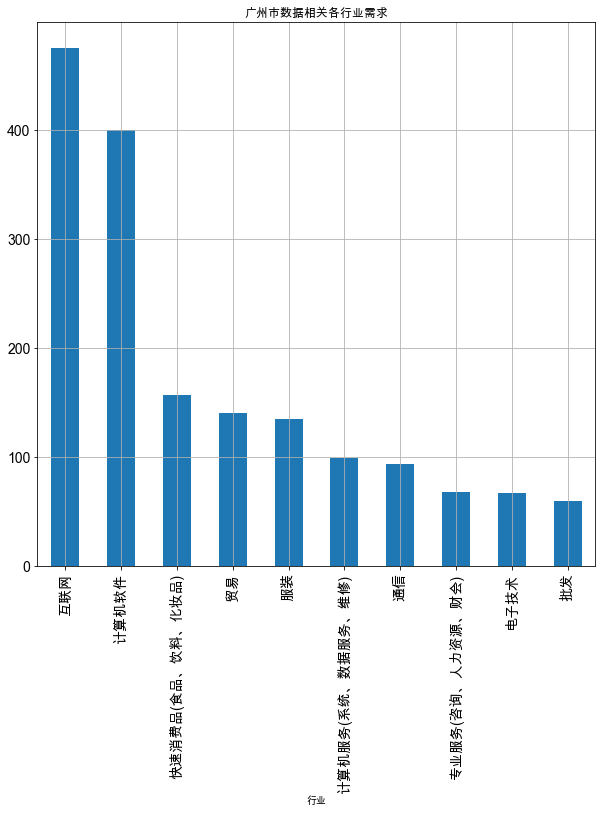

In [74]:
行业数统计.plot(figsize=(10,10),fontsize='14',kind='bar',title='广州市数据相关各行业需求',grid=True)

## 岗位数量统计

In [39]:
岗位=df_清洗后.岗位名

In [41]:
岗位统计=df_清洗后.groupby(by='岗位名').size().sort_values(ascending=False).head(10)
display(岗位统计)

岗位名
运营       708
数据分析     557
大数据      187
开发工程师    164
数据库       66
运维        32
数据管理      29
数据文员      28
测试        25
数据产品      17
dtype: int64

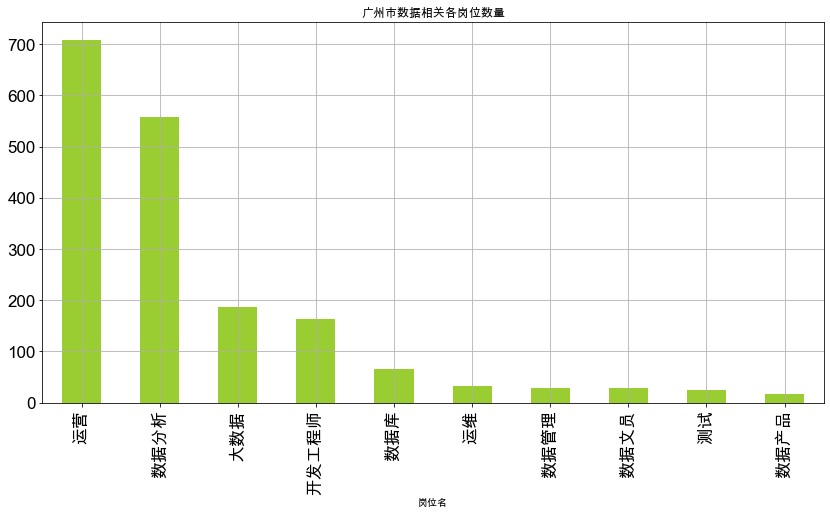

In [76]:
岗位统计.plot(figsize=(14,7),\
             kind='bar',\
             color='yellowgreen',\
             title='广州市数据相关各岗位数量',\
             fontsize='17',\
             grid=True)

## 岗位薪资水平（取平均值）

In [212]:
# 岗位薪资水平（取平均）
岗位薪资=df_清洗后.groupby(by='岗位名').agg({"工资水平":["mean"]}).sort_values(by=("工资水平","mean"),ascending=False).reset_index().head(10)#.iloc[7:17]

In [131]:
# 看平均薪资
岗位薪资

,岗位名,工资水平
,,mean
0,数据中心总经理,500000.000000
1,数据中心营运总监,45833.333333
2,数据总监,37500.000000
3,博士后研究员（数据传输与交换）,36666.666667
4,群益科技--数据中心经理（社会招聘）,35000.000000
5,高级web 全栈开发,30000.000000
6,数据模型工程师：,30000.000000
7,销售工程师（弹性时间、各项福利、底薪+奖金）,29166.666667
8,数据架构师（数据中台方向）,27500.000000


In [178]:
# 处理下岗位名‘（）’里的不要🙅
a=岗位薪资['岗位名'].to_list()
b=[]
for i in a:
    b.append(str(i).split('（'))
# print(b)
岗位名_处理=[]
for x in b:
    岗位名_处理.append(x[0])
岗位名_处理

['数据中心总经理',
 '数据中心营运总监',
 '数据总监',
 '博士后研究员',
 '群益科技--数据中心经理',
 '高级web 全栈开发',
 '数据模型工程师：',
 '销售工程师',
 '数据架构师',
 '数据技术研究员']

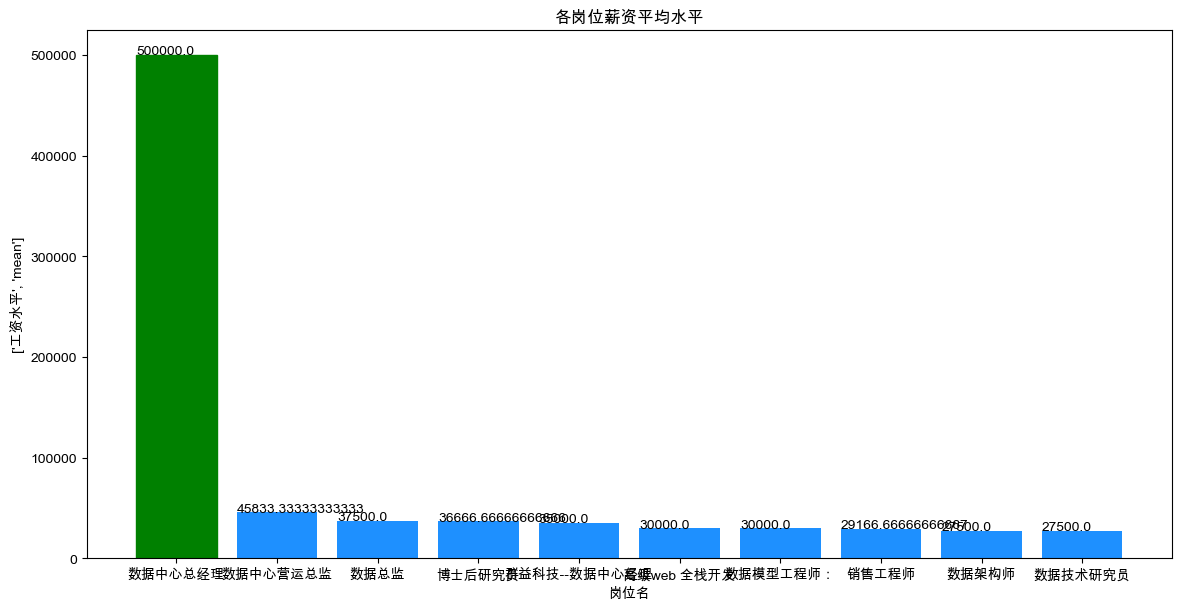

In [195]:
# 画图
bar = plt.bar(岗位名_处理,岗位薪资["工资水平","mean"].values, color='dodgerblue')
bar[0].set_color('green')

# 给条形图添加数据标注
for x, y in enumerate(岗位薪资["工资水平","mean"].values):
    plt.text(x-0.4, y+500, "%s" %y)

plt.tick_params(labelsize=10)
plt.xlabel('岗位名')
plt.ylabel(["工资水平","mean"])
plt.title('各岗位薪资平均水平')
plt.rcParams['figure.figsize'] = (14, 7)
# plt.rcParams['savefig.dpi'] = 100 #图片像素
# plt.rcParams['figure.dpi'] = 100 #分辨率

## 行业薪资水平（平均值）

In [207]:
行业工资水平_前10=df_清洗后.groupby(by='行业').agg({"工资水平":["min","max","mean"]}).rename(columns={'min':'最小值','max':'最大值','mean':'平均值'}).sort_values(by=("工资水平","平均值"),ascending=False).head(10).reset_index()
行业工资水平_前10

行业    工资水平                             
                 最小值            最大值           平均值
0        房地产  2500.0  500000.000000  22113.703704
1       租赁服务  5000.0   25000.000000  14166.666667
2         石油  7500.0   20000.000000  13552.083333
3       中介服务  7000.0   25000.000000  12600.000000
4       网络游戏  3700.0   27500.000000  12183.333333
5      计算机软件  2500.0   41666.666667  12129.583333
6  多元化业务集团公司  3750.0   45833.333333  11731.481481
7         学术  5000.0   23333.333333  11541.666667
8         电气  5250.0   20833.333333  11238.888889
9         教育  2500.0   35000.000000  11155.660377

In [208]:
# 行业薪资
行业工资水平_前10

行业    工资水平                             
                 最小值            最大值           平均值
0        房地产  2500.0  500000.000000  22113.703704
1       租赁服务  5000.0   25000.000000  14166.666667
2         石油  7500.0   20000.000000  13552.083333
3       中介服务  7000.0   25000.000000  12600.000000
4       网络游戏  3700.0   27500.000000  12183.333333
5      计算机软件  2500.0   41666.666667  12129.583333
6  多元化业务集团公司  3750.0   45833.333333  11731.481481
7         学术  5000.0   23333.333333  11541.666667
8         电气  5250.0   20833.333333  11238.888889
9         教育  2500.0   35000.000000  11155.660377

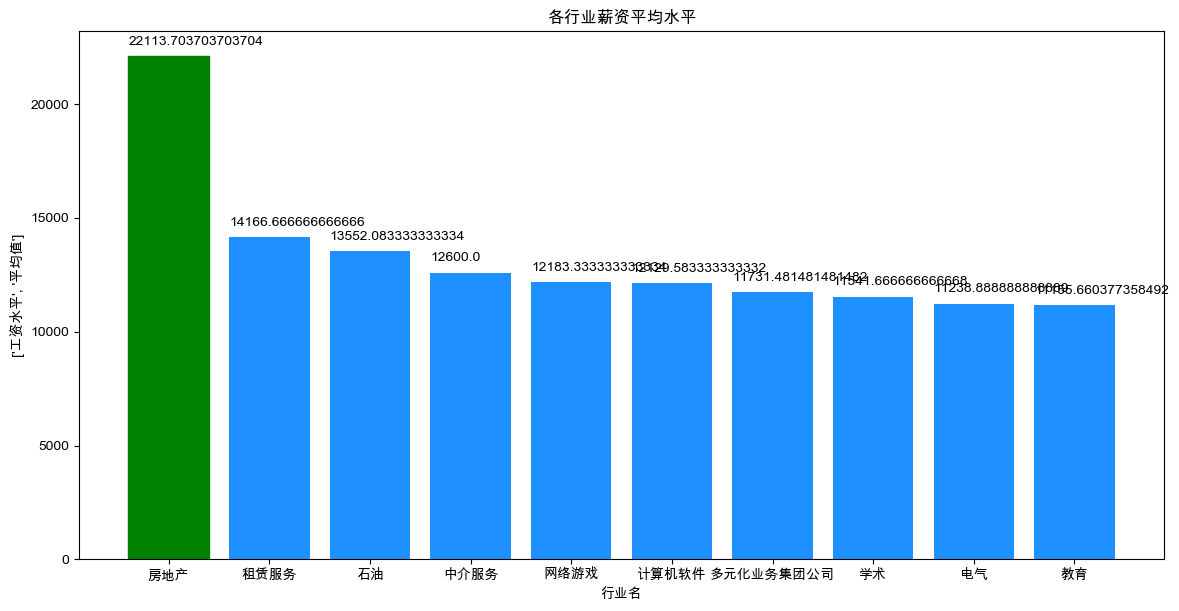

In [209]:
# 行业工资水平画图
bar = plt.bar(行业工资水平_前10['行业'],行业工资水平_前10["工资水平","平均值"].values, color='dodgerblue')
bar[0].set_color('green')

# 给条形图添加数据标注
for x, y in enumerate(行业工资水平_前10["工资水平","平均值"].values):
    plt.text(x-0.4, y+500, "%s" %y)

plt.tick_params(labelsize=10)
plt.xlabel('行业名')
plt.ylabel(["工资水平","平均值"])
plt.title('各行业薪资平均水平')
plt.rcParams['figure.figsize'] = (14, 7)
# plt.rcParams['savefig.dpi'] = 100 #图片像素
# plt.rcParams['figure.dpi'] = 100 #分辨率